In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

- [Dashboard](#1)
- [Сonnecting necessary libraries add Codeadd Markdown](#2)
- [Data loading and quick look](#3)
- [Exploratory data analysis](#4)
    - [Countries with the highest ladder score](#5)
    - [Countries and their ladder score on the map](#6)
    - [Statistics on GDP per capita](#7)
    - [How social support affects ladder score](#8)
    - [Influence of generosity on social support](#9)
    - [Healthy life expectancy and ladder score per region](#10)
    - [Correlation between features](#11)

# Dashboard <i id='1'></i>

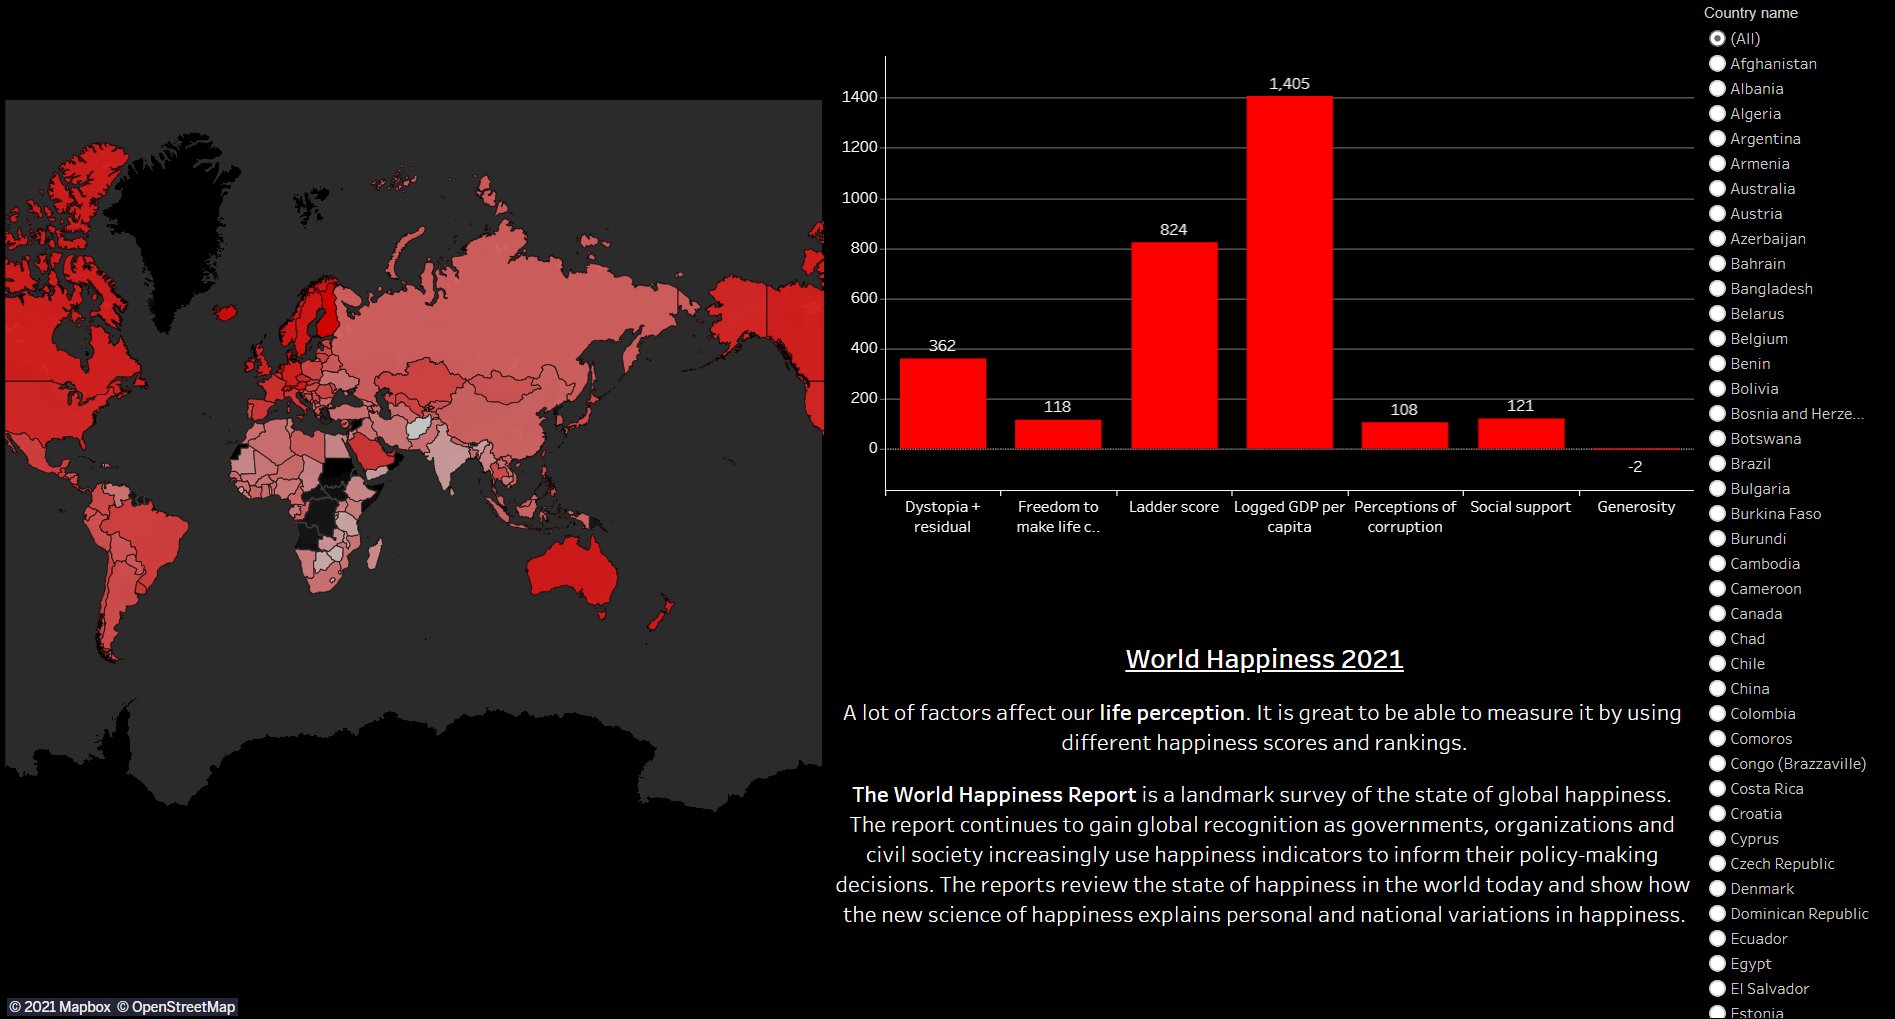

#### You can check this dashboard on Tableau Public: https://public.tableau.com/profile/oleg.dargov#!/vizhome/Happiness_16178714306780/Dashboard1

# Сonnecting necessary libraries <i id='2'></i>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
import panel as pn
import pycountry
sns.set(rc={'figure.figsize':(16,8)})
pn.extension("plotly")
warnings.filterwarnings('ignore')

# Data loading and quick look <i id='3'></i>

In [ ]:
df = pd.read_csv('/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df.drop(['Standard error of ladder score', 'upperwhisker', 'lowerwhisker'], axis=1, inplace=True)

# Exploratory data analysis <i id='4'></i>

## Countries with the highest ladder score <i id='5'></i>

In [ ]:
country_score = df.groupby('Country name')['Ladder score'].sum().sort_values(ascending=False).head(50)
country_score

In [ ]:
fig = sns.barplot(x=country_score.index, y=country_score, data=country_score, color='#57D19C')
fig.set_xticklabels(rotation=90, labels=country_score.index)
fig

## Countries and their ladder score on the map <i id='6'></i>

In [ ]:
list_countries = df['Country name'].unique().tolist()
d_country_code = {}
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})

In [ ]:
for k, v in d_country_code.items():
    df.loc[(df['Country name'] == k), 'Country_codes'] = v

In [ ]:
fig = px.choropleth(data_frame = df,
                    locations= "Country_codes",
                    color= "Ladder score",
                    hover_name= "Country name",
                    color_continuous_scale= 'RdYlGn'
                   )

fig.show()

## Statistics on GDP per capita <i id='7'></i>

In [ ]:
fig = sns.boxplot(df['Logged GDP per capita'], width=0.4)

In [ ]:
fig = sns.distplot(df['Logged GDP per capita'], color='#AE5ABE')

## How social support affects ladder score <i id='8'></i>

In [ ]:
fig = sns.regplot(x='Social support', y='Ladder score', data=df, color='#DB7D74')

## Influence of generosity on social support <i id='9'></i>

In [ ]:
fig = sns.distplot(df['Generosity'], color='#B7BE5A')

In [ ]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = sns.jointplot(x='Generosity', y='Social support', data=df, kind="hex", color='#8FD35B')

## Healthy life expectancy and ladder score per region <i id='10'></i>

In [ ]:
fig = sns.relplot(
    data=df,
    x="Healthy life expectancy", y="Ladder score",
    hue="Regional indicator",
    palette='flare', sizes=(30, 400),
)

## Correlation between features <i id='11'></i>

In [ ]:
sns.pairplot(df, hue="Regional indicator")

In [ ]:
sns.lmplot(x="Ladder score in Dystopia", 
           y="Ladder score", 
           data=df, 
           fit_reg=False, 
           hue='Regional indicator', 
           legend=False)

In [ ]:
sns.lmplot(x="Explained by: Perceptions of corruption", 
           y="Perceptions of corruption", 
           data=df, 
           fit_reg=False, 
           hue='Regional indicator', 
           legend=False)

#### All the "Explained" (including ladder score in dystopia) features are completely correlated with one another, so we can drop them

In [ ]:
df.drop(['Ladder score in Dystopia', 'Explained by: Perceptions of corruption','Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices','Explained by: Generosity'], axis=1, inplace=True)

In [ ]:
df_corr = df.corr()
fig = sns.heatmap(df_corr, annot=True, cmap='flare')